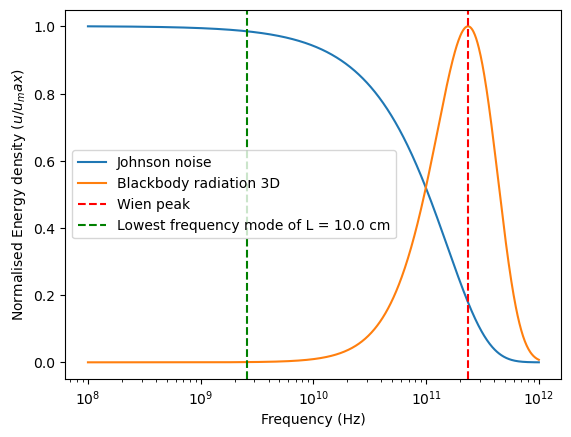

In [10]:
from scipy.constants import k, h, e, c
import numpy as np
import matplotlib.pyplot as plt

def energy_density_1D(f, T):
    u = f / (np.exp(h* f / (k * T)) - 1)
    return u / np.max(u)
def energy_density_3D(f, T):
    u = f**3 / (np.exp(h * f / (k * T)) - 1)
    return u / np.max(u)

T = 4
L = 0.1
f = np.logspace(8, 12, 1000)  # Frequency range from 1 THz to 1 PHz
plt.semilogx(f, energy_density_1D(f, T), label='Johnson noise')
plt.semilogx(f, energy_density_3D(f, T), label='Blackbody radiation 3D')
plt.axvline(c * T / 5.099e-3, color='r', linestyle='--', label='Wien peak')
plt.axvline(c * np.sqrt(3) / (2 * L), color='g', linestyle='--', label=f'Lowest frequency mode of L = {L*100} cm')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalised Energy density ($u / u_max$)')
plt.legend()

Lowest frequency mode in a box $\nu_\textrm{min} = \frac{c \sqrt{3}}{2 L}$, then:

In [15]:
L = 0.1
print(f"{c * np.sqrt(3) / (2 * L):.2e} Hz")

2.60e+09 Hz


In [4]:
import numpy as np

np.log2(2048)

np.float64(11.0)

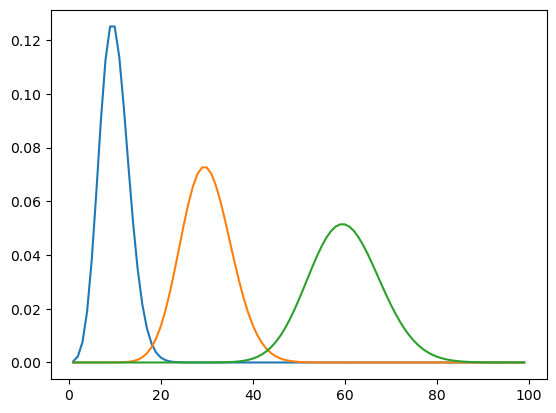

In [9]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
n_list = [10, 30, 60]
n_range = np.arange(1, 100)
for n in n_list:
    alpha = np.sqrt(n)
    plt.plot(n_range, np.exp(-n) * alpha**(2 * n_range) / factorial(n_range))

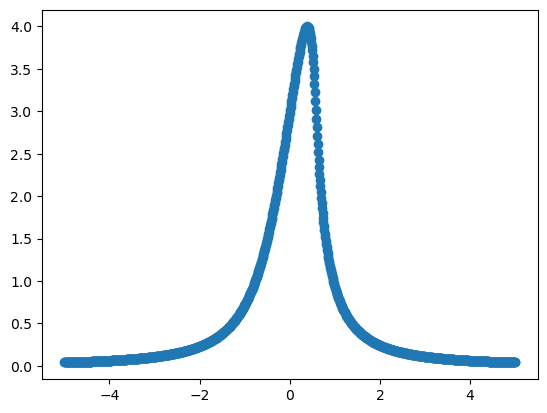

In [136]:
import numpy as np

def pump_response(delta, kappa, gamma, xi):
    return np.roots([xi**2, -2*delta*xi, (delta**2+0.25), -kappa/(kappa+gamma)**2])

kappa = 1.0
gamma = 0.0
delta_plot = np.linspace(-5, 5, 1000)
xi = 0.5/np.sqrt(27)
photons = []
dd = []
for d in delta_plot:
    n = pump_response(d, kappa, gamma, xi)
    for n_i in n:
        if np.isreal(n_i):
            photons.append(np.abs(n_i))
            dd.append(d)
plt.plot(dd, photons, 'o')

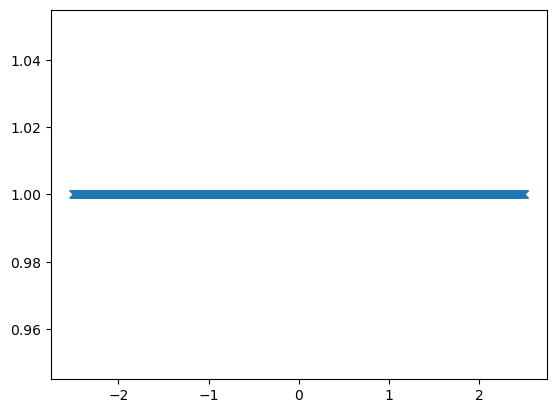

In [119]:
def pump_reflection(n, delta, kappa, gamma, xi):
    return np.abs(kappa/(kappa+gamma) / (0.5 - (delta - xi*n)*1j) - 1)

reflection = [pump_reflection(n, delta, kappa, gamma, xi) for n, delta in zip(photons, dd)]
plt.plot(dd, reflection, 'x')

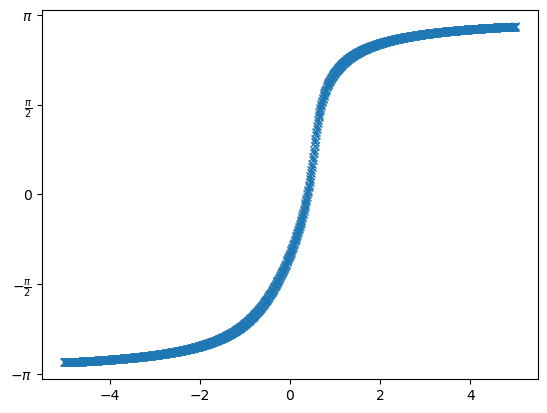

In [137]:
def pump_phase(n, delta, kappa, gamma, xi):
    return np.angle(kappa/(kappa+gamma) / (0.5 - (delta - xi*n)*1j) - 1) / np.pi

phase = [pump_phase(n, delta, kappa, gamma, xi) for n, delta in zip(photons, dd)]
plt.plot(dd, phase, 'x')
_ = plt.yticks(np.linspace(-1, 1, 5), ["$-\\pi$", "$-\\frac{\\pi}{2}$", "0", "$\\frac{\\pi}{2}$", "$\\pi$"])

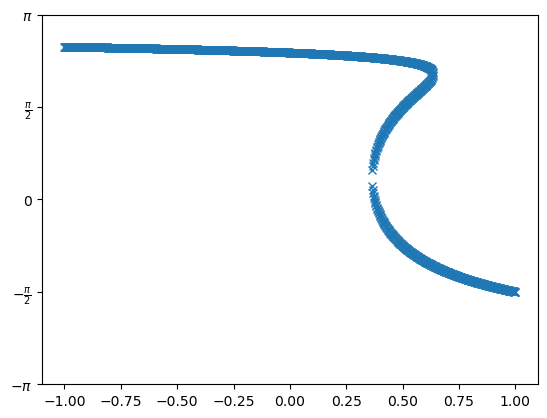

In [161]:
delta = 1.5
xi_plot = np.linspace(-1, 1, 1000)
xi_resp = []
photons = []
for xi in xi_plot:
    n = pump_response(delta, kappa, gamma, xi)
    for n_i in n:
        if np.isreal(n_i):
            photons.append(np.abs(n_i))
            xi_resp.append(xi)
phase = [pump_phase(n, delta, kappa, gamma, xi) for n, xi in zip(photons, xi_resp)]
plt.plot(xi_resp, phase, 'x')
_ = plt.yticks(np.linspace(-1, 1, 5), ["$-\\pi$", "$-\\frac{\\pi}{2}$", "0", "$\\frac{\\pi}{2}$", "$\\pi$"])


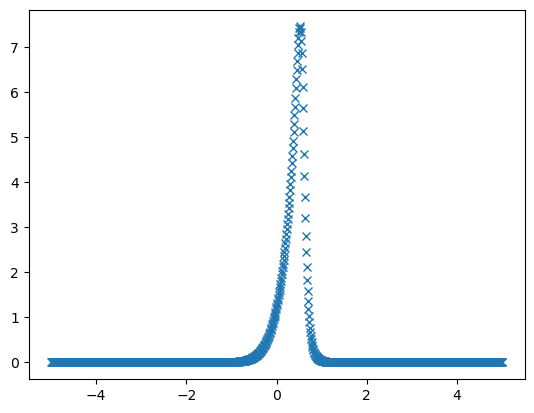

In [138]:
from numpy.lib.scimath import sqrt

def amp_gain(n, delta_pump, delta_sig, kappa, gamma, xi):
    lambda_p = 0.5 + sqrt((xi*n)**2 - (delta_pump - 2*xi*n)**2)
    lambda_p = lambda_p if np.isscalar(lambda_p) else lambda_p[0]
    lambda_m = 0.5 - sqrt((xi*n)**2 - (delta_pump - 2*xi*n)**2)
    lambda_m = lambda_m if np.isscalar(lambda_m) else lambda_m[0]
    return 10*np.log10((kappa*xi*n)**2/((kappa+gamma)**2*np.abs((1j*delta_sig - lambda_m)*(1j*delta_sig - lambda_p))**2) + 1)

gain = [amp_gain(n, delta, 0, kappa, gamma, xi) for n, delta in zip(photons, dd)]
plt.plot(dd, gain, 'x')

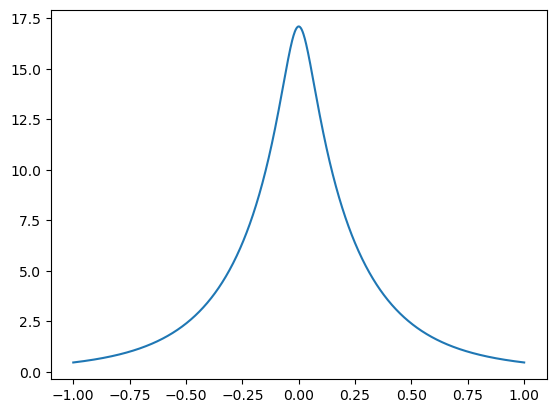

In [96]:
max_gain_idx = np.argmax(gain)
det_sig = np.linspace(-1, 1, 1000)
plt.plot(det_sig, amp_gain(photons[max_gain_idx+200], dd[max_gain_idx+200], det_sig, kappa, gamma, xi))

In [98]:
from sympy import symbols, arg, I

loss = symbols('loss', real=True)
det = symbols('det', real=True)
xi_n = symbols('xi_n', real=True)

ref = loss / (0.5 - (det - xi_n)*I) - 1
phase = arg(ref)
print(phase)

arg(loss/(-I*(det - xi_n) + 0.5) - 1)


In [ ]:
# INIT PROJECTIONS (FROM -Z)
with switch_(projection):
            # Z-projection: X gate
            with case_(1):
                play(
                    control_pulse * amp(rabi_amp),
                    qubit,
                )
                play(
                    control_pulse * amp(rabi_amp),
                    qubit,
                )
            with case_(2):  # -Z-projection: Identity gate
                pass
            with case_(3):  # X-projection: -Y/2 gate
                frame_rotation_2pi(-0.25, qubit)
                play(
                    control_pulse * amp(rabi_amp),
                    qubit,
                )
                frame_rotation_2pi(-0.75, qubit)
            with case_(4):  # -X-projection: Y/2 gate
                frame_rotation_2pi(0.25, qubit)
                play(
                    control_pulse * amp(rabi_amp),
                    qubit,
                )
                frame_rotation_2pi(0.75, qubit)
            with case_(5):  # Y-projection: X/2 gate
                play(
                    control_pulse * amp(rabi_amp),
                    qubit,
                )
            with case_(6):  # -Y-projection: -X/2 gate
                frame_rotation_2pi(0.5, qubit)
                play(
                    control_pulse * amp(rabi_amp),
                    qubit,
                )
                frame_rotation_2pi(0.5, qubit)
